In [1]:
import pandas
import numpy

import seaborn
import matplotlib

In [2]:
crimes = pandas.read_csv("crimes_dataset.csv", sep=";")

In [3]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Location
0,I182070304,1107,Fraud,905,1/11/2017 0:00,2017,11,Wednesday,0,Part Two,"(42.33926764, -71.07208833)"
1,I182070115,3114,Investigate Property,793,11/10/2017 17:43,2017,10,Wednesday,17,Part Three,"(42.34650102, -71.13612792)"
2,I182069920,3201,Property Lost,287,31/8/2017 12:08,2017,8,Thursday,12,Part Three,"(42.33192532, -71.08411222)"
3,I182069657,1102,Fraud,774,27/6/2017 7:00,2017,6,Tuesday,7,Part Two,"(42.33848236, -71.15288978)"
4,I182069334,3201,Property Lost,420,8/12/2017 22:00,2017,12,Friday,22,Part Three,"(42.27959103, -71.08132258)"


In [4]:
crimes["LATITUDE"] = crimes.apply(lambda row: float(row.Location[1:-1].split(",")[0]), axis=1)
crimes["LONGITUDE"] = crimes.apply(lambda row: float(row.Location[1:-1].split(",")[1]), axis=1)

In [5]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Location,LATITUDE,LONGITUDE
0,I182070304,1107,Fraud,905,1/11/2017 0:00,2017,11,Wednesday,0,Part Two,"(42.33926764, -71.07208833)",42.339268,-71.072088
1,I182070115,3114,Investigate Property,793,11/10/2017 17:43,2017,10,Wednesday,17,Part Three,"(42.34650102, -71.13612792)",42.346501,-71.136128
2,I182069920,3201,Property Lost,287,31/8/2017 12:08,2017,8,Thursday,12,Part Three,"(42.33192532, -71.08411222)",42.331925,-71.084112
3,I182069657,1102,Fraud,774,27/6/2017 7:00,2017,6,Tuesday,7,Part Two,"(42.33848236, -71.15288978)",42.338482,-71.152890
4,I182069334,3201,Property Lost,420,8/12/2017 22:00,2017,12,Friday,22,Part Three,"(42.27959103, -71.08132258)",42.279591,-71.081323


In [6]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INCIDENT_NUMBER     200000 non-null  object 
 1   OFFENSE_CODE        200000 non-null  int64  
 2   OFFENSE_CODE_GROUP  200000 non-null  object 
 3   REPORTING_AREA      200000 non-null  object 
 4   OCCURRED_ON_DATE    200000 non-null  object 
 5   YEAR                200000 non-null  int64  
 6   MONTH               200000 non-null  int64  
 7   DAY_OF_WEEK         200000 non-null  object 
 8   HOUR                200000 non-null  int64  
 9   UCR_PART            199927 non-null  object 
 10  Location            200000 non-null  object 
 11  LATITUDE            200000 non-null  float64
 12  LONGITUDE           200000 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 19.8+ MB


In [7]:
crimes.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,LATITUDE,LONGITUDE
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,2337.048075,2016.504430,6.557570,13.151550,39.342474,-66.084613
std,1180.652714,0.499982,3.375336,6.283656,10.832083,18.169995
min,111.000000,2016.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1102.000000,2016.000000,4.000000,9.000000,42.290122,-71.095266
50%,3006.000000,2017.000000,7.000000,14.000000,42.320536,-71.075456
75%,3201.000000,2017.000000,9.000000,18.000000,42.347093,-71.059765
max,3831.000000,2017.000000,12.000000,23.000000,42.395042,0.000000


In [8]:
crimes.drop(crimes[crimes.LATITUDE < 5].index, inplace=True)

In [9]:
crimes.columns

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK',
       'HOUR', 'UCR_PART', 'Location', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

In [10]:
numpy.where(crimes.isnull().values)

(array([  5014,   6671,   8152,  11865,  13189,  14273,  15703,  16614,
         19071,  19421,  20184,  25190,  29456,  30050,  36573,  42423,
         45337,  45338,  47070,  48698,  56421,  61317,  62082,  63179,
         63429,  64139,  64264,  65112,  67908,  68092,  68155,  69972,
         72498,  74841,  80522,  82261,  84563,  86644,  93611,  94208,
         97303,  97775,  98973,  99106,  99263, 101578, 103340, 105916,
        106153, 107616, 113306, 113948, 116657, 118109, 118125, 120388,
        123800, 127352, 128377, 128893, 131134, 133348, 149257, 150396,
        157941, 159505, 161537, 162452, 162693, 163354, 175864, 185903,
        185917], dtype=int64),
 array([9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
        9, 9, 9, 9, 9, 9, 9], dtype=int64))

In [11]:
crimes.iloc[:, 9]

0           Part Two
1         Part Three
2         Part Three
3           Part Two
4         Part Three
             ...    
199993    Part Three
199994      Part Two
199995      Part Two
199998    Part Three
199999    Part Three
Name: UCR_PART, Length: 185930, dtype: object

C:\Users\pablo.sanchezgonzale\.virtualenvs\bostoncrimes-KUItBg9W\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


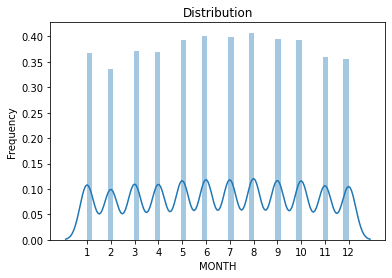

In [12]:
seaborn.distplot(crimes['MONTH'])
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.title('Distribution')
matplotlib.pyplot.xticks(list(range(1,13,1)))
matplotlib.pyplot.show()

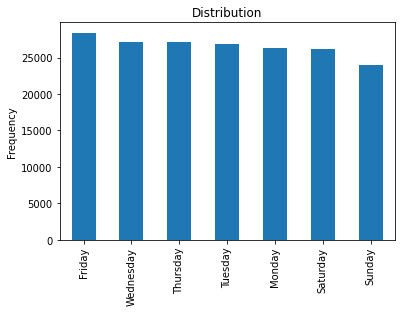

In [13]:
crimes['DAY_OF_WEEK'].value_counts().plot(kind='bar')
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.title('Distribution')
matplotlib.pyplot.show()

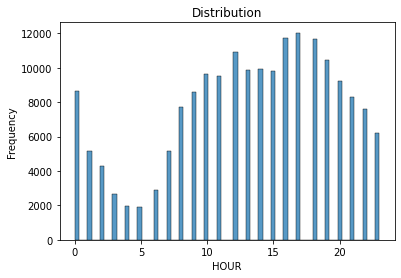

In [14]:
seaborn.histplot(crimes['HOUR'])
matplotlib.pyplot.ylabel('Frequency')
matplotlib.pyplot.title('Distribution')
matplotlib.pyplot.show()

In [15]:
print(min(crimes["YEAR"]), max(crimes["YEAR"]))

2016 2017


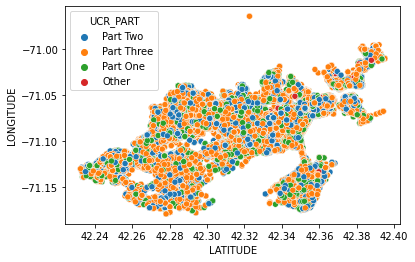

In [ ]:
seaborn.scatterplot(x='LATITUDE',
               y='LONGITUDE',
                hue="UCR_PART",
               data=crimes)
matplotlib.pyplot.show()

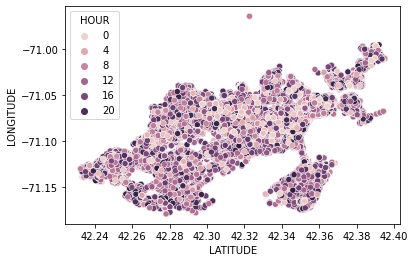

In [ ]:
seaborn.scatterplot(x='LATITUDE',
               y='LONGITUDE',
                hue="HOUR",
               data=crimes)
matplotlib.pyplot.show()

In [ ]:
xx = crimes.drop("UCR_PART", axis=1)

In [ ]:
yy = crimes.UCR_PART

In [ ]:
yy

0           Part Two
1         Part Three
2         Part Three
3           Part Two
4         Part Three
             ...    
199993    Part Three
199994      Part Two
199995      Part Two
199998    Part Three
199999    Part Three
Name: UCR_PART, Length: 185930, dtype: object

In [ ]:
xx.describe()

,OFFENSE_CODE,YEAR,MONTH,HOUR,LATITUDE,LONGITUDE
count,185930.000000,185930.000000,185930.000000,185930.000000,185930.000000,185930.000000
mean,2314.198483,2016.504652,6.547007,13.164965,42.322206,-71.082932
std,1178.210651,0.499980,3.384046,6.264450,0.031880,0.029793
min,111.000000,2016.000000,1.000000,0.000000,42.232413,-71.178674
25%,1102.000000,2016.000000,4.000000,9.000000,42.297521,-71.097464
50%,3001.000000,2017.000000,7.000000,14.000000,42.325475,-71.077562
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062563
max,3831.000000,2017.000000,12.000000,23.000000,42.395042,-70.964365


In [ ]:
from sklearn.preprocessing import LabelEncoder

xx.apply(LabelEncoder().fit_transform)

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'REPORTING_AREA', 'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK',
       'HOUR', 'Location', 'LATITUDE', 'LONGITUDE'],
      dtype='object')